In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hockey_rink import IIHFRink, Rink, NHLRink

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df_games = pd.read_csv('Data/Linhac24_Sportlogiq.csv')

In [3]:
df_games['eventid'] = df_games.index

In [4]:
df_games.eventname.unique()

array(['faceoff', 'lpr', 'pass', 'reception', 'block', 'puckprotection',
       'carry', 'check', 'controlledentryagainst', 'controlledentry',
       'controlledexit', 'icing', 'dumpout', 'dumpin', 'shot', 'penalty',
       'penaltydrawn', 'save', 'rebound', 'assist', 'goal', 'offside',
       'soshot', 'sogoal', 'sopuckprotection'], dtype=object)

In [5]:
df_shots = df_games[df_games.eventname == 'shot'].copy()

In [6]:
df_shots_one_game = df_shots[df_shots.gameid == df_shots.gameid.unique()[0]].copy()

In [7]:
df_games.head()

,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord,eventid
0,72393,553243.0,885,489917,172367.0,814,NaN,NaN,NaN,0.000000,faceoff,1,evenStrength,5,failed,1,F,0,5,none,0.304306,0.251442,0
1,72393,172367.0,814,435025,553243.0,885,NaN,NaN,NaN,0.000000,faceoff,0,evenStrength,5,successful,1,F,0,5,recovered,-0.304306,-0.251442,1
2,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,1.333333,lpr,0,evenStrength,5,successful,1,F,0,5,faceoffcontested,0.205826,0.245975,2
3,72393,553243.0,885,489917,172367.0,814,885.0,0.0,NaN,1.333333,lpr,1,evenStrength,5,failed,1,F,0,5,contested,-0.205826,-0.245975,3
4,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,2.166667,pass,0,evenStrength,5,successful,1,F,0,5,south,3.223473,3.766563,4


In [8]:
df_games.playerprimaryposition.unique()

array(['F', 'D', 'G'], dtype=object)

In [9]:
df_games_goalie_events = df_games.loc[df_games.playerprimaryposition == 'G'].copy()

In [10]:
df_games_goalie_events.eventname.value_counts()

eventname
save                      8059
rebound                   4998
lpr                       2425
pass                      2265
controlledentryagainst     357
block                      110
dumpout                    106
controlledexit              93
reception                   70
check                       45
penaltydrawn                15
puckprotection               9
icing                        8
assist                       8
penalty                      3
controlledentry              1
Name: count, dtype: int64

In [11]:
df_goalie_passes = df_games_goalie_events[df_games_goalie_events.eventname == 'pass'].copy()

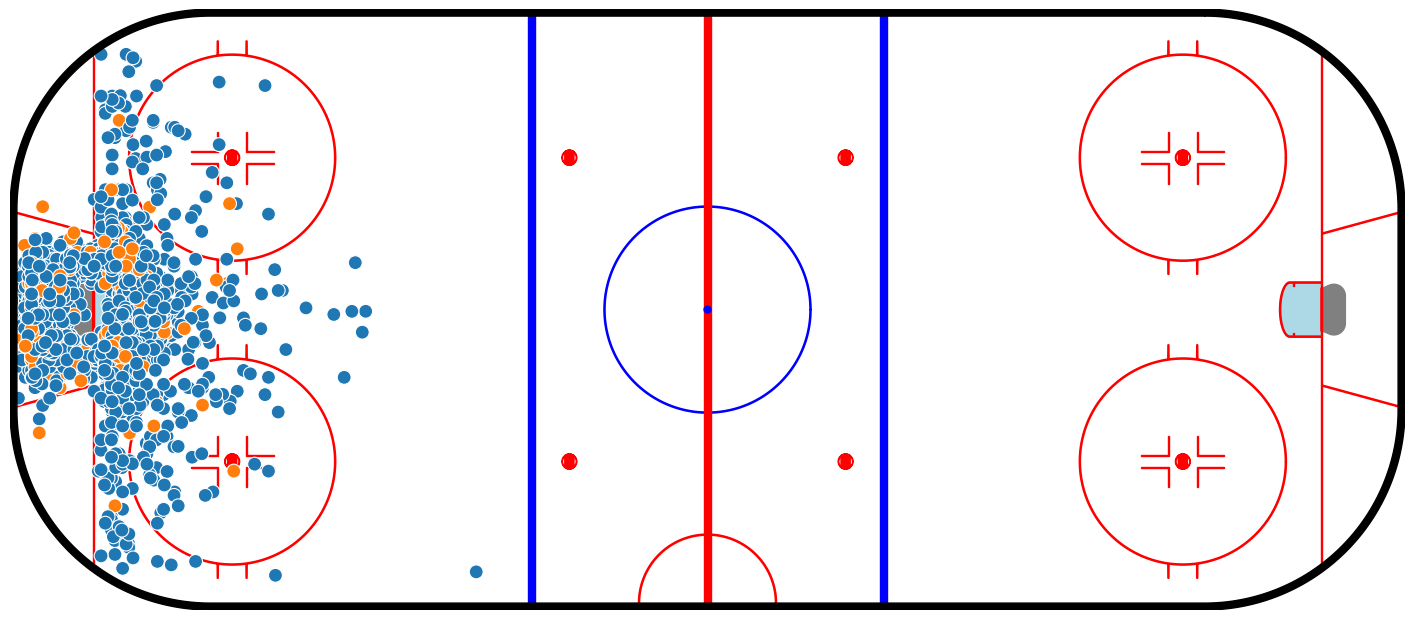

In [12]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.plot_fn(sns.scatterplot, x="xadjcoord", y="yadjcoord", s=100, legend=False, data=df_goalie_passes, ax=ax, hue='outcome')
plt.show()

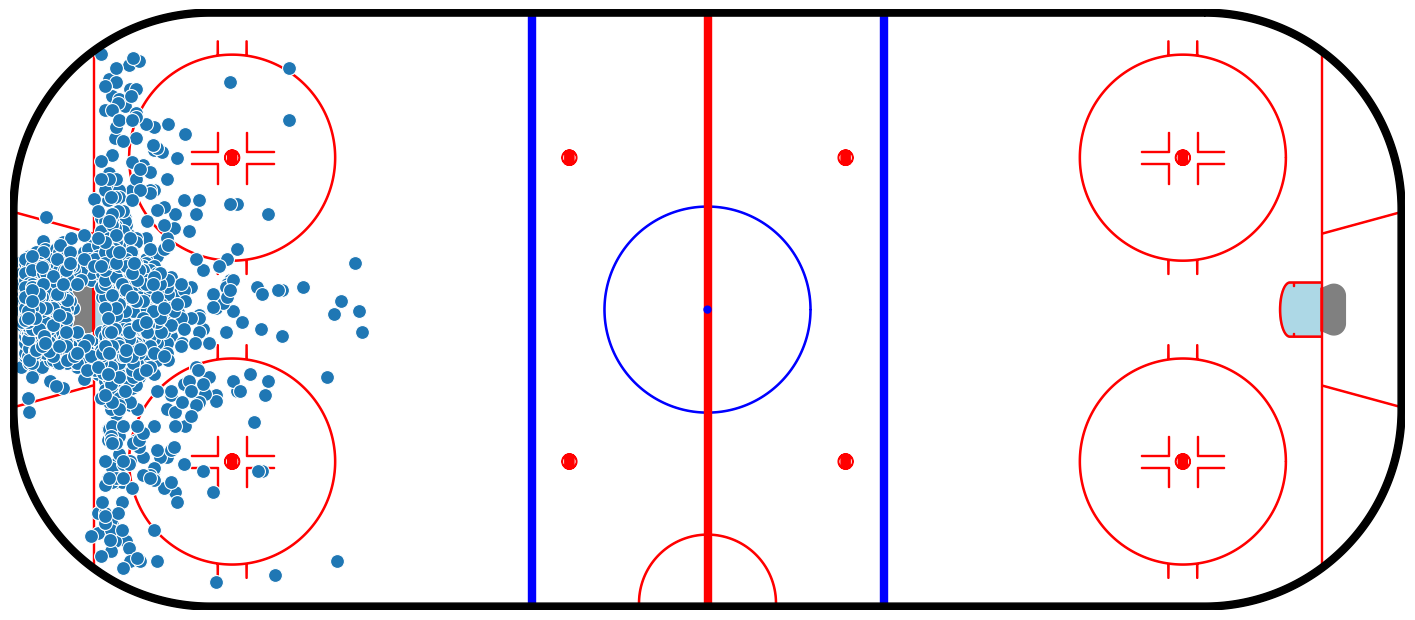

In [13]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.plot_fn(sns.scatterplot, x="xadjcoord", y="yadjcoord", s=100, legend=False, data=df_games_goalie_events[df_games_goalie_events.eventname == 'lpr'], ax=ax)
plt.show()

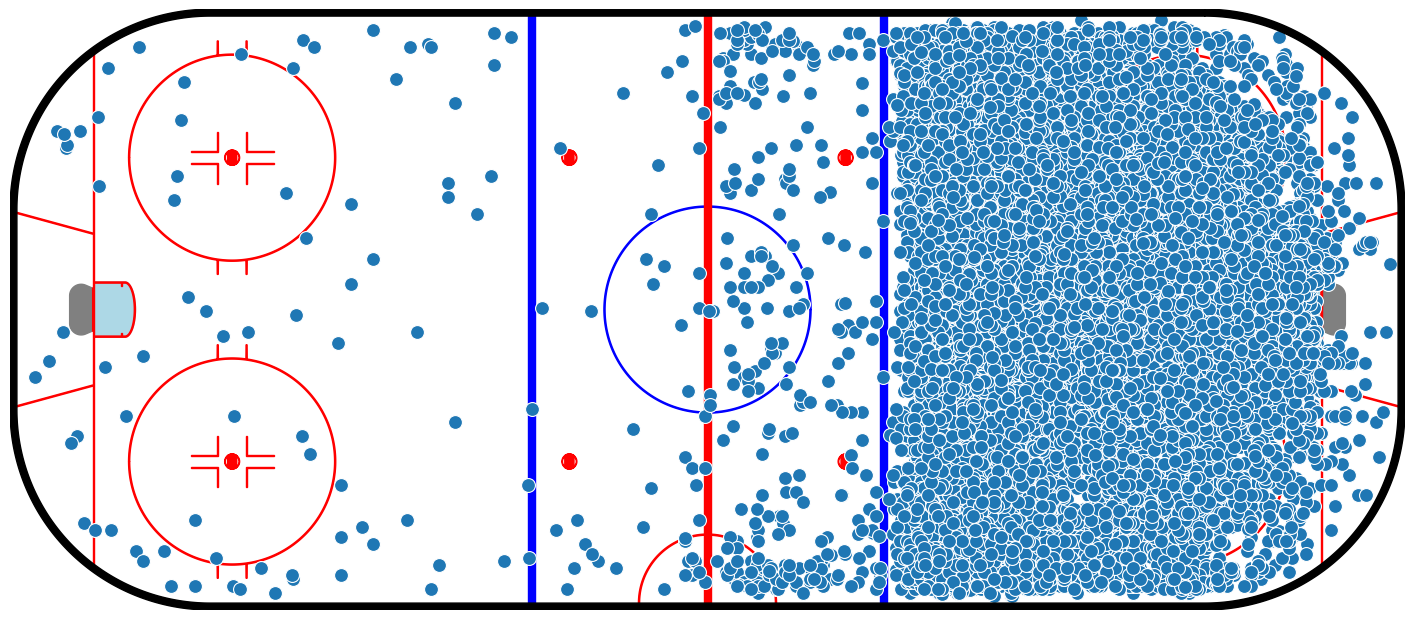

In [14]:
rink = NHLRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.plot_fn(sns.scatterplot, x="xadjcoord", y="yadjcoord", s=100, legend=False, data=df_games[df_games.eventname == 'shot'], ax=ax)
plt.show()

In [15]:
df_goalie_passes.outcome.value_counts()

outcome
successful      1939
failed           325
undetermined       1
Name: count, dtype: int64

In [16]:
df_games_goalie_events[df_games_goalie_events.eventname == 'pass'].shape, df_games[df_games.eventname == 'pass'].shape

((2265, 23), (128975, 23))

## Creating new attributes

What should be part of move actions? 

- pass, end_event: reception
- loose puck recovery (lpr), end event: next event
- carry, end event: next event
- dumpin, end: next event: 
- dumpout, end: next event
- shot
- check
- faceoff, end event: lpr
- rebound

end events:
- reception
- puck protection
- icing
- penalty
- offside

Which actions are "info" events

- controlledexit
- controlledentry (1699)
    - pass 248
    - pass with stretch 42
    - pass offboards 37
    - pass stretch + offboards 23
- block
- save
- assist
- goal

drop 
- soshot
- sogoal
- penaltydrawn
- controlledentryagainst


In [17]:
df_games['outcome_code'] = df_games.outcome.astype('category').cat.codes
df_games.head()

,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord,eventid,outcome_code
0,72393,553243.0,885,489917,172367.0,814,NaN,NaN,NaN,0.000000,faceoff,1,evenStrength,5,failed,1,F,0,5,none,0.304306,0.251442,0,0
1,72393,172367.0,814,435025,553243.0,885,NaN,NaN,NaN,0.000000,faceoff,0,evenStrength,5,successful,1,F,0,5,recovered,-0.304306,-0.251442,1,1
2,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,1.333333,lpr,0,evenStrength,5,successful,1,F,0,5,faceoffcontested,0.205826,0.245975,2,1
3,72393,553243.0,885,489917,172367.0,814,885.0,0.0,NaN,1.333333,lpr,1,evenStrength,5,failed,1,F,0,5,contested,-0.205826,-0.245975,3,0
4,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,2.166667,pass,0,evenStrength,5,successful,1,F,0,5,south,3.223473,3.766563,4,1


In [18]:
df_games.loc[(df_games.eventname == "faceoff") & (df_games.outcome_code == 0), 'eventname'] = 'faceoff_lost'
df_games.head()

,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord,eventid,outcome_code
0,72393,553243.0,885,489917,172367.0,814,NaN,NaN,NaN,0.000000,faceoff_lost,1,evenStrength,5,failed,1,F,0,5,none,0.304306,0.251442,0,0
1,72393,172367.0,814,435025,553243.0,885,NaN,NaN,NaN,0.000000,faceoff,0,evenStrength,5,successful,1,F,0,5,recovered,-0.304306,-0.251442,1,1
2,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,1.333333,lpr,0,evenStrength,5,successful,1,F,0,5,faceoffcontested,0.205826,0.245975,2,1
3,72393,553243.0,885,489917,172367.0,814,885.0,0.0,NaN,1.333333,lpr,1,evenStrength,5,failed,1,F,0,5,contested,-0.205826,-0.245975,3,0
4,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,2.166667,pass,0,evenStrength,5,successful,1,F,0,5,south,3.223473,3.766563,4,1


In [19]:
df_games.loc[df_games.shift(-1).eventname == 'controlledexit', 'is_exit'] = 1
df_games['is_exit'].fillna(0, inplace=True)
df_games.loc[df_games.shift(-1).eventname == 'controlledentry', 'is_entry'] = 1
df_games['is_entry'].fillna(0, inplace=True)
df_games.loc[df_games.shift(-1).eventname == 'block', 'is_blocked'] = 1
df_games['is_blocked'].fillna(0, inplace=True)
df_games.loc[df_games.shift(-1).eventname == 'save', 'is_saved'] = 1
df_games['is_saved'].fillna(0, inplace=True)
df_games.loc[df_games.shift(-1).eventname == 'assist', 'is_assist'] = 1
df_games['is_assist'].fillna(0, inplace=True)
df_games.loc[df_games.shift(-1).eventname == 'goal', 'is_goal'] = 1
df_games['is_goal'].fillna(0, inplace=True)
df_games.head()

/var/folders/fh/7p9x8r7s26n72fzxk8b2rs500000gn/T/ipykernel_3408/4227859848.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['is_exit'].fillna(0, inplace=True)
/var/folders/fh/7p9x8r7s26n72fzxk8b2rs500000gn/T/ipykernel_3408/4227859848.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord,eventid,outcome_code,is_exit,is_entry,is_blocked,is_saved,is_assist,is_goal
0,72393,553243.0,885,489917,172367.0,814,NaN,NaN,NaN,0.000000,faceoff_lost,1,evenStrength,5,failed,1,F,0,5,none,0.304306,0.251442,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,72393,172367.0,814,435025,553243.0,885,NaN,NaN,NaN,0.000000,faceoff,0,evenStrength,5,successful,1,F,0,5,recovered,-0.304306,-0.251442,1,1,0.0,0.0,0.0,0.0,0.0,0.0
2,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,1.333333,lpr,0,evenStrength,5,successful,1,F,0,5,faceoffcontested,0.205826,0.245975,2,1,0.0,0.0,0.0,0.0,0.0,0.0
3,72393,553243.0,885,489917,172367.0,814,885.0,0.0,NaN,1.333333,lpr,1,evenStrength,5,failed,1,F,0,5,contested,-0.205826,-0.245975,3,0,0.0,0.0,0.0,0.0,0.0,0.0
4,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,2.166667,pass,0,evenStrength,5,successful,1,F,0,5,south,3.223473,3.766563,4,1,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_games[1:25]

,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord,eventid,outcome_code,is_exit,is_entry,is_blocked,is_saved,is_assist,is_goal
1,72393,172367.0,814,435025,553243.0,885,NaN,NaN,NaN,0.000000,faceoff,0,evenStrength,5,successful,1,F,0,5,recovered,-0.304306,-0.251442,1,1,0.0,0.0,0.0,0.0,0.0,0.0
2,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,1.333333,lpr,0,evenStrength,5,successful,1,F,0,5,faceoffcontested,0.205826,0.245975,2,1,0.0,0.0,0.0,0.0,0.0,0.0
3,72393,553243.0,885,489917,172367.0,814,885.0,0.0,NaN,1.333333,lpr,1,evenStrength,5,failed,1,F,0,5,contested,-0.205826,-0.245975,3,0,0.0,0.0,0.0,0.0,0.0,0.0
4,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,2.166667,pass,0,evenStrength,5,successful,1,F,0,5,south,3.223473,3.766563,4,1,0.0,0.0,0.0,0.0,0.0,0.0
5,72393,172367.0,814,706220,553243.0,885,885.0,0.0,NaN,2.966667,reception,0,evenStrength,5,successful,1,D,0,5,regular,-19.911827,11.310680,5,1,0.0,0.0,0.0,0.0,0.0,0.0
6,72393,172367.0,814,706220,553243.0,885,885.0,0.0,NaN,4.466667,pass,0,evenStrength,5,failed,1,D,0,5,north,-7.338295,26.398914,6,0,0.0,0.0,1.0,0.0,0.0,0.0
7,72393,553243.0,885,213380,172367.0,814,885.0,0.0,NaN,4.700000,block,1,evenStrength,5,successful,1,F,0,5,pass,1.813835,-24.897058,7,1,0.0,0.0,0.0,0.0,0.0,0.0
8,72393,553243.0,885,213380,172367.0,814,814.0,1.0,NaN,6.033333,lpr,1,evenStrength,5,successful,1,F,0,5,none,-17.800873,-40.991177,8,1,0.0,0.0,0.0,0.0,0.0,0.0
9,72393,553243.0,885,213380,172367.0,814,814.0,1.0,NaN,6.533333,puckprotection,1,evenStrength,5,successful,1,F,0,5,body,-16.794991,-40.488235,9,1,0.0,0.0,0.0,0.0,0.0,0.0
10,72393,553243.0,885,213380,172367.0,814,814.0,1.0,NaN,8.500000,carry,1,evenStrength,5,successful,1,F,0,5,none,-0.700874,-38.979412,10,1,0.0,0.0,0.0,0.0,0.0,0.0


## Identifying end location of passes

In [21]:
df_games['next_event'] = df_games.shift(-1, fill_value='end')['eventname']
df_games['interruption'] = df_games.apply(lambda x: 1 if ((x['next_event'] == 'icing') | (x['next_event'] == 'penalty') | (x['next_event'] == 'offside'))   else 0, axis=1)
df_games['next_teamid'] = df_games.shift(-1, fill_value=0)['teamid']
df_games['next_teaminpossession'] = df_games.shift(-1)['teaminpossession']
df_games['prev_event'] = df_games.shift(1, fill_value='start')['eventname']

In [22]:
df_games.loc[~df_games['eventname'].isin(['controlledentry', 'controlledexit', 'goal', 'shot', 'assist', 'soshot', 'sogoal', 'sopuckprotection', 'faceoff_lost']), 'xadjcoord_end'] = df_games.loc[~df_games['eventname'].isin(['controlledentry', 'controlledexit', 'goal', 'shot', 'assist', 'soshot', 'sogoal', 'sopuckprotection', 'faceoff_lost']), 'xadjcoord'].shift(-1)
df_games.loc[~df_games['eventname'].isin(['controlledentry', 'controlledexit', 'goal', 'shot', 'assist', 'soshot', 'sogoal', 'sopuckprotection', 'faceoff_lost']), 'yadjcoord_end'] = df_games.loc[~df_games['eventname'].isin(['controlledentry', 'controlledexit', 'goal', 'shot', 'assist', 'soshot', 'sogoal', 'sopuckprotection', 'faceoff_lost']), 'yadjcoord'].shift(-1)

In [23]:
# adjust coordinates to be in the same direction all the time
df_games.loc[(df_games['next_teamid'] != df_games['teamid']) & (~df_games['eventname'].isin(['controlledentry', 'controlledexit', 'goal', 'shot', 'assist', 'soshot', 'sogoal', 'sopuckprotection', 'faceoff_lost'])), 'yadjcoord_end'] = df_games.loc[(df_games['next_teamid'] != df_games['teamid']) & (~df_games['eventname'].isin(['controlledentry', 'controlledexit', 'goal', 'shot', 'assist', 'soshot', 'sogoal', 'sopuckprotection', 'faceoff_lost'])), 'yadjcoord_end'].mul(-1)
df_games.loc[(df_games['next_teamid'] != df_games['teamid']) & (~df_games['eventname'].isin(['controlledentry', 'controlledexit', 'goal', 'shot', 'assist', 'soshot', 'sogoal', 'sopuckprotection', 'faceoff_lost'])), 'xadjcoord_end'] = df_games.loc[(df_games['next_teamid'] != df_games['teamid']) & (~df_games['eventname'].isin(['controlledentry', 'controlledexit', 'goal', 'shot', 'assist', 'soshot', 'sogoal', 'sopuckprotection', 'faceoff_lost'])), 'xadjcoord_end'].mul(-1)

In [24]:
df_games.loc[df_games.eventname.isin(["pass"]) & (df_games.outcome_code == 1), 'xadjcoord_end'] = df_games.loc[df_games.eventname.isin(['reception']) & (df_games.outcome_code == 1), 'xadjcoord'].to_list()
df_games.loc[df_games.eventname.isin(["pass"]) & (df_games.outcome_code == 1), 'yadjcoord_end'] = df_games.loc[df_games.eventname.isin(['reception']) & (df_games.outcome_code == 1), 'yadjcoord'].to_list()

In [25]:
df_games.loc[df_games.eventname.isin(["pass", 'reception']) & (df_games.outcome_code == 1), ['eventname', 'teamid', 'xadjcoord', 'yadjcoord', 'xadjcoord_end', 'yadjcoord_end']].head(20)

,eventname,teamid,xadjcoord,yadjcoord,xadjcoord_end,yadjcoord_end
4,pass,885,3.223473,3.766563,-19.911827,11.310680
5,reception,885,-19.911827,11.310680,-7.338295,26.398914
29,pass,885,94.758759,26.901855,96.770531,-8.806969
30,reception,885,96.770531,-8.806969,98.271461,4.276470
46,pass,814,-69.100876,22.882355,-92.747002,22.889320
47,reception,814,-92.747002,22.889320,-91.741112,24.901085
54,pass,814,-96.770531,4.280499,-94.255821,9.309910
55,reception,814,-94.255821,9.309910,-91.238174,23.392258
56,pass,814,-91.238174,23.392258,-12.276413,-40.481266
58,reception,814,-12.276413,-40.481266,-12.276413,-40.481266


In [26]:
df_games.head(20)

,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord,eventid,outcome_code,is_exit,is_entry,is_blocked,is_saved,is_assist,is_goal,next_event,interruption,next_teamid,next_teaminpossession,prev_event,xadjcoord_end,yadjcoord_end
0,72393,553243.0,885,489917,172367.0,814,NaN,NaN,NaN,0.000000,faceoff_lost,1,evenStrength,5,failed,1,F,0,5,none,0.304306,0.251442,0,0,0.0,0.0,0.0,0.0,0.0,0.0,faceoff,0,885,NaN,start,NaN,NaN
1,72393,172367.0,814,435025,553243.0,885,NaN,NaN,NaN,0.000000,faceoff,0,evenStrength,5,successful,1,F,0,5,recovered,-0.304306,-0.251442,1,1,0.0,0.0,0.0,0.0,0.0,0.0,lpr,0,885,885.0,faceoff_lost,0.205826,0.245975
2,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,1.333333,lpr,0,evenStrength,5,successful,1,F,0,5,faceoffcontested,0.205826,0.245975,2,1,0.0,0.0,0.0,0.0,0.0,0.0,lpr,0,814,885.0,faceoff,0.205826,0.245975
3,72393,553243.0,885,489917,172367.0,814,885.0,0.0,NaN,1.333333,lpr,1,evenStrength,5,failed,1,F,0,5,contested,-0.205826,-0.245975,3,0,0.0,0.0,0.0,0.0,0.0,0.0,pass,0,885,885.0,lpr,-3.223473,-3.766563
4,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,2.166667,pass,0,evenStrength,5,successful,1,F,0,5,south,3.223473,3.766563,4,1,0.0,0.0,0.0,0.0,0.0,0.0,reception,0,885,885.0,lpr,-19.911827,11.310680
5,72393,172367.0,814,706220,553243.0,885,885.0,0.0,NaN,2.966667,reception,0,evenStrength,5,successful,1,D,0,5,regular,-19.911827,11.310680,5,1,0.0,0.0,0.0,0.0,0.0,0.0,pass,0,885,885.0,pass,-7.338295,26.398914
6,72393,172367.0,814,706220,553243.0,885,885.0,0.0,NaN,4.466667,pass,0,evenStrength,5,failed,1,D,0,5,north,-7.338295,26.398914,6,0,0.0,0.0,1.0,0.0,0.0,0.0,block,0,814,885.0,reception,-1.813835,24.897058
7,72393,553243.0,885,213380,172367.0,814,885.0,0.0,NaN,4.700000,block,1,evenStrength,5,successful,1,F,0,5,pass,1.813835,-24.897058,7,1,0.0,0.0,0.0,0.0,0.0,0.0,lpr,0,814,814.0,pass,-17.800873,-40.991177
8,72393,553243.0,885,213380,172367.0,814,814.0,1.0,NaN,6.033333,lpr,1,evenStrength,5,successful,1,F,0,5,none,-17.800873,-40.991177,8,1,0.0,0.0,0.0,0.0,0.0,0.0,puckprotection,0,814,814.0,block,-16.794991,-40.488235
9,72393,553243.0,885,213380,172367.0,814,814.0,1.0,NaN,6.533333,puckprotection,1,evenStrength,5,successful,1,F,0,5,body,-16.794991,-40.488235,9,1,0.0,0.0,0.0,0.0,0.0,0.0,carry,0,814,814.0,lpr,-0.700874,-38.979412


In [27]:
df_move = df_games.loc[df_games.eventname.isin(['pass','lpr','shot','dumpout','dumpin','carry'])].copy()
df_move.head()

,gameid,opposingteamgoalieoniceid,opposingteamid,playerid,teamgoalieoniceid,teamid,teaminpossession,currentpossession,xg_allattempts,compiledgametime,eventname,ishomegame,manpowersituation,opposingteamskatersonicecount,outcome,period,playerprimaryposition,scoredifferential,teamskatersonicecount,type,xadjcoord,yadjcoord,eventid,outcome_code,is_exit,is_entry,is_blocked,is_saved,is_assist,is_goal,next_event,interruption,next_teamid,next_teaminpossession,prev_event,xadjcoord_end,yadjcoord_end
2,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,1.333333,lpr,0,evenStrength,5,successful,1,F,0,5,faceoffcontested,0.205826,0.245975,2,1,0.0,0.0,0.0,0.0,0.0,0.0,lpr,0,814,885.0,faceoff,0.205826,0.245975
3,72393,553243.0,885,489917,172367.0,814,885.0,0.0,NaN,1.333333,lpr,1,evenStrength,5,failed,1,F,0,5,contested,-0.205826,-0.245975,3,0,0.0,0.0,0.0,0.0,0.0,0.0,pass,0,885,885.0,lpr,-3.223473,-3.766563
4,72393,172367.0,814,435025,553243.0,885,885.0,0.0,NaN,2.166667,pass,0,evenStrength,5,successful,1,F,0,5,south,3.223473,3.766563,4,1,0.0,0.0,0.0,0.0,0.0,0.0,reception,0,885,885.0,lpr,-19.911827,11.310680
6,72393,172367.0,814,706220,553243.0,885,885.0,0.0,NaN,4.466667,pass,0,evenStrength,5,failed,1,D,0,5,north,-7.338295,26.398914,6,0,0.0,0.0,1.0,0.0,0.0,0.0,block,0,814,885.0,reception,-1.813835,24.897058
8,72393,553243.0,885,213380,172367.0,814,814.0,1.0,NaN,6.033333,lpr,1,evenStrength,5,successful,1,F,0,5,none,-17.800873,-40.991177,8,1,0.0,0.0,0.0,0.0,0.0,0.0,puckprotection,0,814,814.0,block,-16.794991,-40.488235


In [28]:
df_move.to_csv("data/Linhac_df_move.csv", index=True)

In [29]:
df_games.to_csv("data/Linhac_df_processed.csv", index=True)